# Creating Lousiana 2015-2025 Flood Dataset
### Sources: 
- National Oceanic and Atmospheric Administration (NOAA)'s Storm Events Database
- U.S Climate Resilience Toolkit - Applied Climate Information System

In [63]:
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

raw_data_path = "raw_data"

# Import the raw data
df_floods = pd.read_csv(os.path.join(raw_data_path,'louisiana_floods_2015-2025.csv'))
for col in df_floods.columns:
    df_floods.rename(columns={col: col.lower()}, inplace=True)
df_floods.head()

,event_id,cz_name_str,begin_location,begin_date,begin_time,event_type,magnitude,tor_f_scale,deaths_direct,injuries_direct,...,end_location,end_date,end_time,begin_lat,begin_lon,end_lat,end_lon,event_narrative,episode_narrative,absolute_rownumber
0,577286,RED RIVER PAR.,HOWARD,05/18/2015,545,Flood,,,0,0,...,HOWARD,05/31/2015,2359,32.2297,-93.4981,32.2309,-93.4236,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,1
1,577292,NATCHITOCHES PAR.,KING HILL,05/18/2015,815,Flood,,,0,0,...,GRAPPES BLUFF,05/31/2015,2359,31.8986,-93.2774,31.9395,-93.2121,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,2
2,577302,WINN PAR.,ST MAURICE,05/18/2015,815,Flood,,,0,0,...,ST MAURICE,05/31/2015,2359,31.7066,-92.9876,31.7382,-92.9993,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,3
3,577296,GRANT PAR.,MONTGOMERY,05/18/2015,815,Flood,,,0,0,...,HARGIS,05/31/2015,2359,31.7066,-92.9931,31.7201,-92.8619,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,4
4,577284,BOSSIER PAR.,FERRY,05/30/2015,2100,Flood,,,0,0,...,FERRY,05/31/2015,2359,33.0168,-93.8590,33.0185,-93.7717,Excessive heavy rainfall during the month of M...,Excessive heavy rainfall during the month of M...,5


In [64]:
df_floods.describe().T

,count,mean,std,min,25%,50%,75%,max
event_id,111.0,7.496041e+05,1.679900e+05,577283.0000,625671.00000,657958.0000,823781.00000,1.197566e+06
begin_time,111.0,1.149964e+03,7.336771e+02,0.0000,600.00000,1300.0000,1800.00000,2.300000e+03
deaths_direct,111.0,7.207207e-02,4.202102e-01,0.0000,0.00000,0.0000,0.00000,4.000000e+00
injuries_direct,111.0,9.009009e-03,9.491580e-02,0.0000,0.00000,0.0000,0.00000,1.000000e+00
damage_property_num,111.0,5.485123e+07,2.357962e+08,0.0000,0.00000,0.0000,500000.00000,1.680000e+09
damage_crops_num,111.0,4.504505e+03,4.745790e+04,0.0000,0.00000,0.0000,0.00000,5.000000e+05
episode_id,111.0,1.243133e+05,2.688041e+04,96046.0000,104446.00000,110040.0000,136353.00000,1.935170e+05
cz_fips,111.0,6.109009e+01,3.587898e+01,1.0000,25.00000,67.0000,98.00000,1.270000e+02
injuries_indirect,111.0,0.000000e+00,0.000000e+00,0.0000,0.00000,0.0000,0.00000,0.000000e+00
deaths_indirect,111.0,9.009009e-03,9.491580e-02,0.0000,0.00000,0.0000,0.00000,1.000000e+00


In [65]:
for i, col in enumerate(df_floods.columns):
    print(f"{i}: {col}")

0: event_id
1: cz_name_str
2: begin_location
3: begin_date
4: begin_time
5: event_type
6: magnitude
7: tor_f_scale
8: deaths_direct
9: injuries_direct
10: damage_property_num
11: damage_crops_num
12: state_abbr
13: cz_timezone
14: magnitude_type
15: episode_id
16: cz_type
17: cz_fips
18: wfo
19: injuries_indirect
20: deaths_indirect
21: source
22: flood_cause
23: tor_length
24: tor_width
25: begin_range
26: begin_azimuth
27: end_range
28: end_azimuth
29: end_location
30: end_date
31: end_time
32: begin_lat
33: begin_lon
34: end_lat
35: end_lon
36: event_narrative
37: episode_narrative
38: absolute_rownumber


In [66]:
df_floods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             111 non-null    int64  
 1   cz_name_str          111 non-null    object 
 2   begin_location       111 non-null    object 
 3   begin_date           111 non-null    object 
 4   begin_time           111 non-null    int64  
 5   event_type           111 non-null    object 
 6   magnitude            111 non-null    object 
 7   tor_f_scale          111 non-null    object 
 8   deaths_direct        111 non-null    int64  
 9   injuries_direct      111 non-null    int64  
 10  damage_property_num  111 non-null    int64  
 11  damage_crops_num     111 non-null    int64  
 12  state_abbr           111 non-null    object 
 13  cz_timezone          111 non-null    object 
 14  magnitude_type       111 non-null    object 
 15  episode_id           111 non-null    int

In [67]:
important_cols = ['begin_date', 'cz_name_str', 'begin_lat', 'begin_lon']
df_floods_filtered = df_floods[important_cols].copy()
df_floods_filtered.rename(columns={'cz_name_str':'County', 'begin_date':'Date',
                                    'begin_lat':'Latitude', 'begin_lon':'Longitude'}, inplace=True)
df_floods_filtered['Flood'] = 1
df_floods_filtered.head()

,Date,County,Latitude,Longitude,Flood
0,05/18/2015,RED RIVER PAR.,32.2297,-93.4981,1
1,05/18/2015,NATCHITOCHES PAR.,31.8986,-93.2774,1
2,05/18/2015,WINN PAR.,31.7066,-92.9876,1
3,05/18/2015,GRANT PAR.,31.7066,-92.9931,1
4,05/30/2015,BOSSIER PAR.,33.0168,-93.8590,1


In [68]:
# Investigate the date range of the data
df_floods_filtered.loc[:, 'Date'] = pd.to_datetime(df_floods_filtered['Date']).dt.date
print(f"Date range: {df_floods_filtered['Date'].min()} to {df_floods_filtered['Date'].max()}")
flood_dates = df_floods_filtered['Date'].unique()
print(f"Number of unique flood dates: {len(flood_dates)}")
print(f"Number of floods: {len(df_floods_filtered)}")

Date range: 2015-05-18 to 2024-06-03
Number of unique flood dates: 51
Number of floods: 111


In [69]:
# Group dates by year
df_floods_filtered['Year'] = pd.to_datetime(df_floods_filtered['Date']).dt.year
for year in sorted(df_floods_filtered['Year'].unique()):
    num_floods = df_floods_filtered[df_floods_filtered['Year'] == year].shape[0]
    print(f"Year {year}: {num_floods} flood events")
    print(df_floods_filtered[df_floods_filtered['Year'] == year]['Date'].value_counts())

df_floods_filtered.drop(columns=['Year'], inplace=True)

Year 2015: 14 flood events
Date
2015-06-01    6
2015-05-18    4
2015-05-30    2
2015-10-26    1
2015-10-31    1
Name: count, dtype: int64
Year 2016: 46 flood events
Date
2016-03-11    14
2016-08-14    10
2016-08-13     6
2016-03-10     4
2016-03-12     4
2016-06-12     2
2016-03-13     2
2016-08-12     2
2016-08-15     2
Name: count, dtype: int64
Year 2017: 2 flood events
Date
2017-08-30    1
2017-09-01    1
Name: count, dtype: int64
Year 2018: 10 flood events
Date
2018-12-31    2
2018-02-22    1
2018-03-07    1
2018-07-30    1
2018-04-01    1
2018-09-10    1
2018-10-15    1
2018-11-13    1
2018-12-28    1
Name: count, dtype: int64
Year 2019: 19 flood events
Date
2019-01-03    3
2019-05-09    3
2019-01-01    2
2019-01-04    2
2019-04-13    2
2019-06-01    2
2019-04-07    1
2019-05-01    1
2019-04-14    1
2019-05-08    1
2019-05-12    1
Name: count, dtype: int64
Year 2020: 6 flood events
Date
2020-07-15    2
2020-04-19    1
2020-07-01    1
2020-07-05    1
2020-07-28    1
Name: count, dt

In [70]:
precip_data_path = os.path.join(raw_data_path, 'precip_summaries')
date_list = flood_dates.tolist()

# precip_cols = ['Name', 'ID', 'County', 'Last30Days',
#                 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1',
#                 'SinceOct1']

# for date in date_list:
#     date_str = date.strftime('%Y-%m-%d')
#     precip_file = os.path.join(precip_data_path, f'{date_str}.csv')
#     if not os.path.exists(precip_file):
#         # Create an empty precipitation file if it doesn't exist
#         df_empty = pd.DataFrame(columns=precip_cols)
#         df_empty.to_csv(precip_file, index=False)

# print("Total precipitation files checked/created:", len(date_list))
# print("Number of precipitation files in directory:", len(os.listdir(precip_data_path)))

# for date in date_list[0:1]:
#     date_str = date.strftime('%Y-%m-%d')
#     print(f"Checking precipitation data for {date_str}")
#     precip_file = os.path.join(precip_data_path, f'{date_str}.csv')
#     if os.path.exists(precip_file):
#         df_precip = pd.read_csv(precip_file)
#         print(f"Precipitation data for {date_str}:")
#         print(df_precip.head())
#     else:
#         print(f"No precipitation data found for {date_str}")

In [71]:
# Parishes in the flood data
df_floods_filtered.loc[:, 'County'] = (df_floods_filtered['County'].str.replace(' Parish','', regex=False)
                                       .str.replace('PAR.', 'PARISH').str.replace('ST. ', 'SAINT '))
flood_parishes = df_floods_filtered['County'].sort_values().unique().tolist()

print("Parishes in the flood data:")
print("Total parishes with flood data:", len(flood_parishes))
df_flood_parishes = pd.DataFrame(flood_parishes, columns=['Parish'])
print(df_flood_parishes)

# Parishes in the precipitation data
precip_files = os.listdir(precip_data_path)
sample_precip_file = os.path.join(precip_data_path, precip_files[0])
df_sample_precip = pd.read_csv(sample_precip_file)
precip_parishes = df_sample_precip['County'].str.lstrip().str.upper().sort_values().unique().tolist()

print("Parishes in the precipitation data:")
print("Total parishes with precipitation data:", len(precip_parishes))
df_precip_parishes = pd.DataFrame(precip_parishes, columns=['Parish'])
print(df_precip_parishes)

Parishes in the flood data:
Total parishes with flood data: 45
                     Parish
0             ACADIA PARISH
1              ALLEN PARISH
2          ASCENSION PARISH
3          AVOYELLES PARISH
4         BEAUREGARD PARISH
5            BOSSIER PARISH
6              CADDO PARISH
7          CALCASIEU PARISH
8           CALDWELL PARISH
9            CAMERON PARISH
10         CATAHOULA PARISH
11           DE SOTO PARISH
12  EAST BATON ROUGE PARISH
13      EAST CARROLL PARISH
14          FRANKLIN PARISH
15             GRANT PARISH
16            IBERIA PARISH
17         IBERVILLE PARISH
18   JEFFERSON DAVIS PARISH
19         JEFFERSON PARISH
20          LA SALLE PARISH
21         LAFAYETTE PARISH
22           LINCOLN PARISH
23        LIVINGSTON PARISH
24           MADISON PARISH
25         MOREHOUSE PARISH
26      NATCHITOCHES PARISH
27           ORLEANS PARISH
28          OUACHITA PARISH
29     POINTE COUPEE PARISH
30           RAPIDES PARISH
31         RED RIVER PARISH
32          R

In [72]:
df_precip_full = pd.DataFrame()

for date in date_list:
    date_str = date.strftime('%Y-%m-%d')
    precip_file = os.path.join(precip_data_path, f'{date_str}.csv')
    if os.path.exists(precip_file):
        df_temp = pd.read_csv(precip_file)
        df_temp['Date'] = date
        df_precip_full = pd.concat([df_precip_full, df_temp], ignore_index=True)

# Manipulate the column values as needed
df_precip_full.loc[:, 'County'] = df_precip_full['County'].str.lstrip().str.upper()

# Drop all unnecesssary columns
important_cols = ['Date', 'County', 'Last30Days', 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1', 'SinceOct1'   ]
df_precip = df_precip_full[important_cols]

# Drop any rows where the county is undefined
df_precip = df_precip[df_precip['County'] != '-']

# Drop any rows where the precip data is missing
print("Number of precip summary entries (before filtering): ", df_precip.shape[0])
precip_data_cols = ['Last30Days', 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1', 'SinceOct1']
bad_values = [' T', ' M']
for col in precip_data_cols:
    df_precip = df_precip[~df_precip[col].isin(bad_values)]

# Convert precip data columns to numberic
for col in precip_data_cols:
    df_precip[col] = pd.to_numeric(df_precip[col], errors='raise')
nan_rows = df_precip[df_precip[precip_data_cols].isnull().any(axis=1)]
print("Number of precip summary entries (after filtering): ", df_precip.shape[0])

# Average precipitation values for duplicate Date-County entries
df_precip = df_precip.groupby(['Date', 'County'], as_index=False).mean()
print("Number of precip summary entries (after averaging): ", df_precip.shape[0])

print(f"Combined precipitation data: {df_precip.shape}")

Number of precip summary entries (before filtering):  13028
Number of precip summary entries (after filtering):  11989
Number of precip summary entries (after averaging):  3030
Combined precipitation data: (3030, 8)


In [73]:
# Merge the precip and flood dataframes based on date and parish
print("Original floods recorded: ",df_floods_filtered.shape[0])
df_merged = pd.merge(df_precip, df_floods_filtered, how='left', left_on=['Date', 'County'], right_on=['Date', 'County'])
df_merged['Flood'] = df_merged['Flood'].fillna(0)   # Fill NaN flood values with 0 (no floods on that date in that parish)

print(df_merged['Flood'].value_counts())

print(f"Merged dataframe shape: {df_merged.shape}")
print(df_merged[df_merged['Flood'] == 1.0].head())

Original floods recorded:  111
Flood
0.0    2940
1.0     105
Name: count, dtype: int64
Merged dataframe shape: (3045, 11)
           Date               County  Last30Days  Last60Days  Last90Days  \
32   2015-05-18  NATCHITOCHES PARISH    4.480000   10.225000   15.930000   
38   2015-05-18     RED RIVER PARISH    1.970000    9.280000   16.000000   
66   2015-05-30       BOSSIER PARISH   10.123750   14.155000   21.540000   
67   2015-05-30         CADDO PARISH   10.598333   15.965833   23.960833   
126  2015-06-01       BOSSIER PARISH   10.755000   14.785000   21.863750   

     Last180Days  SinceJan1  SinceOct1  Latitude  Longitude  Flood  
32      31.98500  25.165000  38.120000   31.8986   -93.2774    1.0  
38      29.17000  19.930000  36.640000   32.2297   -93.4981    1.0  
66      34.57500  31.565000  42.518750   33.0168   -93.8590    1.0  
67      38.53750  34.958333  48.678333   33.0179   -93.8473    1.0  
126     35.16625  32.196250  43.150000   33.0180   -93.8631    1.0  


In [74]:
# Non-flood data
df_non_flood = df_merged[df_merged['Flood'] == 0]

# Create a random sample of non-flood data (to be removed) to balance the dataset
non_flood_size = 500 # twice the number of flood events
df_non_flood_sample = df_non_flood.sample(n=(df_non_flood.shape[0] - non_flood_size), random_state=42)

# Remove the sampled non-flood data from the merged dataframe
df_balanced = df_merged.drop(df_non_flood_sample.index)

# Print the class distribution after balancing
print("Class distribution after balancing:")
print(df_balanced['Flood'].value_counts())
print(df_balanced.head())

Class distribution after balancing:
Flood
0.0    500
1.0    105
Name: count, dtype: int64
          Date                   County  Last30Days  Last60Days  Last90Days  \
1   2015-05-18             ALLEN PARISH    3.330000    9.445000   13.540000   
4   2015-05-18         AVOYELLES PARISH    3.430000   12.073333   19.466667   
11  2015-05-18           CAMERON PARISH    5.476000   12.252000   16.028000   
16  2015-05-18  EAST BATON ROUGE PARISH    4.480435    9.725652   14.598261   
19  2015-05-18        EVANGELINE PARISH    5.050000   11.220000   15.170000   

    Last180Days  SinceJan1  SinceOct1  Latitude  Longitude  Flood  
1     26.825000  23.485000  31.400000       NaN        NaN    0.0  
4     30.043333  26.643333  35.320000       NaN        NaN    0.0  
11    28.684000  24.470000  33.758000       NaN        NaN    0.0  
16    26.852609  20.783913  31.873478       NaN        NaN    0.0  
19    27.375000  22.640000  32.355000       NaN        NaN    0.0  


In [75]:
# ----- Filling in Lat/Lon Columns ----- #

from geopy.geocoders import Nominatim
import time

# Create a detaframe of the parishes
parishes = pd.DataFrame({'County': df_balanced['County'].drop_duplicates()})

# Create geolocator (important to set a user agent)
geolocator = Nominatim(user_agent="parish_locator")

def get_parish_centroid(parish_name):
    """
    Returns (latitude, longitude) for a Louisiana parish.
    Uses OpenStreetMap geocoding via geopy.
    """
    if pd.isna(parish_name) or parish_name.strip() == "":
        return (None, None)

    # Ensure the query clearly specifies Louisiana
    query = f"{parish_name}, Louisiana"

    try:
        # Geocode with retry protection
        location = geolocator.geocode(query, timeout=10)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except Exception:
        return (None, None)

# Apply with a slight delay to avoid Nominatim rate-limits
def safe_geocode(parish):
    result = get_parish_centroid(parish)
    time.sleep(1)   # avoid hitting the rate limit
    return result

if not os.path.exists(os.path.join(raw_data_path, "parish_centroids.csv")):
    # Apply to your floods dataframe
    parishes[['Parish_Lat', 'Parish_Lon']] = parishes['County'].apply(
        lambda x: pd.Series(safe_geocode(x))
    )
    parishes.to_csv(os.path.join(raw_data_path, "parish_centroids.csv"))
else:
    parishes = pd.read_csv(os.path.join(raw_data_path, "parish_centroids.csv"))

# Merge parish centroids into df_balanced
df_centroids = df_balanced.merge(
    parishes[['County', 'Parish_Lat', 'Parish_Lon']],
    on='County',
    how='left'
)
df_centroids['Latitude'] = df_centroids['Latitude'].fillna(df_centroids['Parish_Lat'])
df_centroids['Longitude'] = df_centroids['Longitude'].fillna(df_centroids['Parish_Lon'])
df_centroids = df_centroids.drop(columns=['Parish_Lat', 'Parish_Lon'])

# Output the new dataframe that should have the Lat/Lon Columns filled
print(df_centroids)

           Date                   County  Last30Days  Last60Days  Last90Days  \
0    2015-05-18             ALLEN PARISH    3.330000    9.445000   13.540000   
1    2015-05-18         AVOYELLES PARISH    3.430000   12.073333   19.466667   
2    2015-05-18           CAMERON PARISH    5.476000   12.252000   16.028000   
3    2015-05-18  EAST BATON ROUGE PARISH    4.480435    9.725652   14.598261   
4    2015-05-18        EVANGELINE PARISH    5.050000   11.220000   15.170000   
..          ...                      ...         ...         ...         ...   
600  2024-06-03           RAPIDES PARISH    9.791111   20.218889   24.337778   
601  2024-06-03         RED RIVER PARISH   10.697500   19.177500   21.920000   
602  2024-06-03            SABINE PARISH    9.786667   21.060000   25.220000   
603  2024-06-03     SAINT BERNARD PARISH    7.895000   14.880000   19.475000   
604  2024-06-03      SAINT HELENA PARISH    8.270000   11.620000   16.680000   

     Last180Days  SinceJan1  SinceOct1 

## Adding Environmental Data Features (Elevation, Slope, Land Cover, etc.)

In [76]:
# Start Google Earth Engine
import ee
import pandas as pd

# Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ml-flood-prediction')

# Create List of lat/lon points for environmental data
lat_lons = df_centroids[['Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)

# Define a feature collection
points = ee.FeatureCollection([
    ee.Feature(ee.Geometry.Point(lon, lat), {'Latitude' : float(lat), 'Longitude': float(lon)})
    for lat, lon in zip(lat_lons['Latitude'], lat_lons['Longitude'])
])


In [77]:
# ---- Adding Land Cover Information ---- #

# ESA WorldCover dataset
collection = ee.ImageCollection("ESA/WorldCover/v200")
landcover_2021 = collection.filter(ee.Filter.eq("system:index", "2021")).first()

if landcover_2021 is None:
    raise ValueError("Could not load WorldCover image for 2021!")

# Sample land cover at each station location
lc_samples = landcover_2021.sampleRegions(
    collection=points,
    scale=10,            # WorldCover is 10 m resolution
    geometries=True      # Keep coordinates in output
)

# Convert result to a Python dictionary
lc_dict = lc_samples.getInfo()

# Extract rows: each row is Feature -> properties
rows = []
for feature in lc_dict['features']:
    props = feature['properties']
    rows.append({
        "Latitude": props['Latitude'],
        "Longitude": props['Longitude'],
        "LC_Class": props['Map'],      # Landcover class code (10,20,30,...)
    })

df_landcover = pd.DataFrame(rows)
lc_labels = {
    10: "Tree cover",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Built-up",
    60: "Bare/Sparse vegetation",
    70: "Snow/Ice",
    80: "Permanent water bodies",
    90: "Herbaceous wetland",
    95: "Mangroves",
    100: "Moss & lichen"
}
df_landcover["LC_Label"] = df_landcover["LC_Class"].map(lc_labels)
print(df_landcover)

      Latitude  Longitude  LC_Class            LC_Label
0    30.655824 -92.859805        10          Tree cover
1    31.047160 -92.001970        10          Tree cover
2    29.888055 -93.184303        90  Herbaceous wetland
3    30.525480 -91.089922        10          Tree cover
4    30.697678 -92.421781        40            Cropland
..         ...        ...       ...                 ...
157  32.361800 -93.757500        10          Tree cover
158  32.330000 -93.800000        10          Tree cover
159  31.988500 -94.017800        10          Tree cover
160  32.323600 -93.680900        10          Tree cover
161  32.518100 -93.861300        50            Built-up

[162 rows x 4 columns]


In [78]:
# ---- Elevation and Slope ---- #

# Load SRTM DEM
srtm = ee.Image("USGS/SRTMGL1_003")

# Derive slope in degrees
slope = ee.Terrain.slope(srtm)

elev_slope = srtm.addBands(slope).sampleRegions(
    collection=points,
    scale=30,
    geometries=False
)

elev_slope_dict = elev_slope.getInfo()

rows = []
for f in elev_slope_dict['features']:
    props = f['properties']
    rows.append({
        "Latitude": props['Latitude'],
        "Longitude": props['Longitude'],
        "Elevation_m": props['elevation'],
        "Slope_deg": props['slope']
    })

df_elev_slope = pd.DataFrame(rows)
print(df_elev_slope)

      Latitude  Longitude  Elevation_m  Slope_deg
0    30.655824 -92.859805           24   3.857615
1    31.047160 -92.001970           14   2.146769
2    29.888055 -93.184303            3   1.069645
3    30.525480 -91.089922           23   4.396959
4    30.697678 -92.421781           22   1.422274
..         ...        ...          ...        ...
157  32.361800 -93.757500           51   6.623484
158  32.330000 -93.800000           59   2.381807
159  31.988500 -94.017800           58   1.093405
160  32.323600 -93.680900           47   2.381664
161  32.518100 -93.861300           52   4.308215

[162 rows x 4 columns]


In [79]:
# ---- Distance From Nearest Streams (NHDPlus HR) ---- #

# USGS NHDPlus High Resolution Flowlines (AVAILABLE)
rivers = ee.FeatureCollection("projects/sat-io/open-datasets/NHD/NHD_LA/NHDFlowline")

# Convert rivers to binary raster: 1 where a flowline exists
river_raster = rivers.reduceToImage(
    properties=['lengthkm'],        # numeric property required
    reducer=ee.Reducer.first()
).gt(0)

# Distance transform in meters
distance_to_river = (
    river_raster.fastDistanceTransform(30)
                .sqrt()
                .multiply(30)
                .rename('Dist_to_River_m')
)

# Sample distance at each point
river_dist = distance_to_river.sampleRegions(
    collection=points,
    scale=30,
    geometries=False
)

# Convert to pandas DataFrame
river_dist_dict = river_dist.getInfo()
rows = []

for f in river_dist_dict['features']:
    props = f['properties']
    rows.append({
        "Latitude": props["Latitude"],
        "Longitude": props["Longitude"],
        "Dist_to_River_m": props["Dist_to_River_m"]
    })

df_river_dist = pd.DataFrame(rows)

print(df_river_dist)

      Latitude  Longitude  Dist_to_River_m
0    30.655824 -92.859805       512.640225
1    31.047160 -92.001970       161.554944
2    29.888055 -93.184303       351.140997
3    30.525480 -91.089922        94.868330
4    30.697678 -92.421781       240.000000
..         ...        ...              ...
157  32.361800 -93.757500        30.000000
158  32.330000 -93.800000        30.000000
159  31.988500 -94.017800        60.000000
160  32.323600 -93.680900       150.000000
161  32.518100 -93.861300       241.867732

[162 rows x 3 columns]


In [80]:
# Combine Environmental Columns
env_df = (df_landcover.merge(df_elev_slope, on=["Latitude", "Longitude"], how="left")
          .merge(df_river_dist, on=["Latitude", "Longitude"], how="left"))
env_df = env_df.drop(columns=['LC_Class'])
env_df['LC_Label'] = env_df['LC_Label'].str.capitalize().replace(' ', '_')
env_df = pd.get_dummies(env_df, columns=['LC_Label'], prefix='LC', prefix_sep=' ', dtype=int)


df_aug = df_centroids.merge(env_df, on=["Latitude", "Longitude"], how="left")
print(df_aug)

           Date                   County  Last30Days  Last60Days  Last90Days  \
0    2015-05-18             ALLEN PARISH    3.330000    9.445000   13.540000   
1    2015-05-18         AVOYELLES PARISH    3.430000   12.073333   19.466667   
2    2015-05-18           CAMERON PARISH    5.476000   12.252000   16.028000   
3    2015-05-18  EAST BATON ROUGE PARISH    4.480435    9.725652   14.598261   
4    2015-05-18        EVANGELINE PARISH    5.050000   11.220000   15.170000   
..          ...                      ...         ...         ...         ...   
600  2024-06-03           RAPIDES PARISH    9.791111   20.218889   24.337778   
601  2024-06-03         RED RIVER PARISH   10.697500   19.177500   21.920000   
602  2024-06-03            SABINE PARISH    9.786667   21.060000   25.220000   
603  2024-06-03     SAINT BERNARD PARISH    7.895000   14.880000   19.475000   
604  2024-06-03      SAINT HELENA PARISH    8.270000   11.620000   16.680000   

     Last180Days  SinceJan1  SinceOct1 

<Axes: >

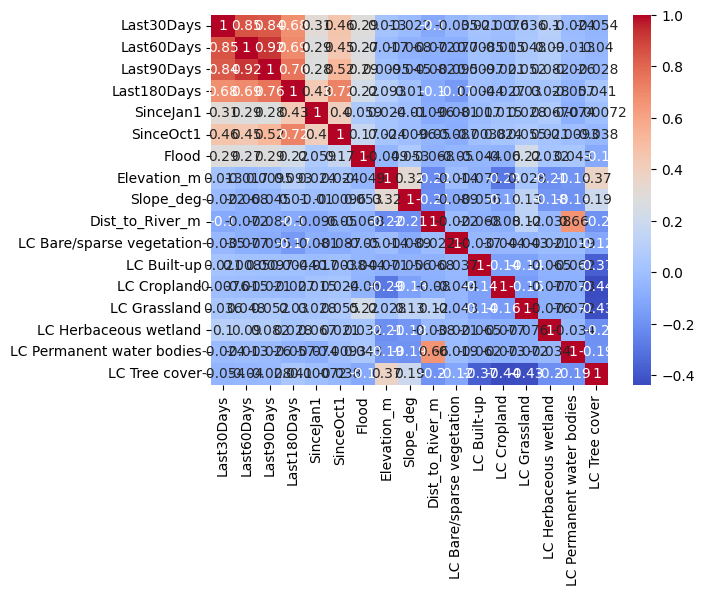

In [81]:
# Simple correlation heatmap
num_cols = df_aug.columns.drop(['Date', 'County', 'Longitude', 'Latitude'])

# num_cols = ['Last30Days', 'Last60Days', 'Last90Days', 'Last180Days', 'SinceJan1', 'SinceOct1', 'Flood']
corr = df_aug[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# simple linear regression model to see where we stand
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

x_cols = num_cols.drop('Flood')

X = df_aug[x_cols]
y = df_aug['Flood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
preds = [1 if pred >= 0.5 else 0 for pred in y_pred]
y_pred = preds
print("TN  FP\nFN  TP")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


TN  FP
FN  TP
[[99  1]
 [19  2]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       100
         1.0       0.67      0.10      0.17        21

    accuracy                           0.83       121
   macro avg       0.75      0.54      0.54       121
weighted avg       0.81      0.83      0.78       121

Accuracy:  0.8347107438016529
F1 Score:  0.16666666666666666


In [89]:
from SimpleNeuralNetwork import SimpleNeuralNetwork
from sklearn.model_selection import train_test_split

# Select feature columns (everything except the label)
target_col = 'Flood'

X = df_aug[x_cols].to_numpy().astype(float)
y = df_aug[target_col].to_numpy().astype(float)

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,     # 20% test set
    random_state=42,   # reproducibility
    stratify=y         # keeps class balance
)

# Train the model
model = SimpleNeuralNetwork(
    input_size=X_train.shape[1],
    hidden_size=16,
    learning_rate=0.01
)

model.fit(X_train, y_train, epochs=1000)

# Make Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Look at Performance
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print("TN  FP\nFN  TP")
print(cm)

print("\nAccuracy:", round(acc, 4))
print("F1 Score:", round(f1, 4))


c:\Users\Glen\repo\MLFloodPrediction\SimpleNeuralNetwork.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0 | Loss: 3.7975
Epoch 100 | Loss: 0.9533
Epoch 200 | Loss: 0.9139
Epoch 300 | Loss: 0.8878
Epoch 400 | Loss: 0.8700
Epoch 500 | Loss: 0.8577
Epoch 600 | Loss: 0.8492
Epoch 700 | Loss: 0.8433
Epoch 800 | Loss: 0.8391
Epoch 900 | Loss: 0.8363
Epoch 999 | Loss: 0.8344
Confusion Matrix:
TN  FP
FN  TP
[[100   0]
 [ 21   0]]

Accuracy: 0.8264
F1 Score: 0.0
